In [1]:
from lib.graph import Graph, GraphVertex, GraphEdge, Queue, Stack, PriorityQueue
from typing import List, Dict, Tuple, Set, Optional

# Graph definition

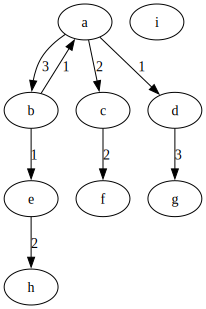

In [2]:
vertices = [
    GraphVertex("a", 0),
    GraphVertex("b", 1),
    GraphVertex("c", 2),
    GraphVertex("d", 3),
    GraphVertex("e", 4),
    GraphVertex("f", 5),
    GraphVertex("g", 6),
    GraphVertex("h", 7),
    GraphVertex("i", 8),
]
    
edges = [
    GraphEdge(vertices[0], vertices[1], 3, directed=True),
    GraphEdge(vertices[0], vertices[2], 2, directed=True),
    GraphEdge(vertices[0], vertices[3], 1, directed=True),
    GraphEdge(vertices[1], vertices[4], 1, directed=True),
    GraphEdge(vertices[1], vertices[0], 1, directed=True),
    GraphEdge(vertices[2], vertices[5], 2, directed=True),
    GraphEdge(vertices[3], vertices[6], 3, directed=True),
    GraphEdge(vertices[4], vertices[7], 2, directed=True),
]

graph = Graph(vertices, edges)
graph.build()
graph.compute_matrix()

graph.to_graphviz(orientation="vertical")

In [3]:
graph

0 a -> b (3) -> c (2) -> d (1)
1 b -> e (1) -> a (1)
2 c -> f (2)
3 d -> g (3)
4 e -> h (2)
5 f
6 g
7 h
8 i

In [4]:
graph.matrix

[[0, 3, 2, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 2, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 2, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

# Iterative Search

In [5]:
for v in graph.search(Queue()):
    if type(v) == GraphVertex:
        print(f"Treat Vertex {v.value}")
    # if type(v) == GraphEdge:
    #     print(f"Treat Edge {v.start.value} -> {v.end.value} ({v.weight})")

Treat Vertex a
Treat Vertex b
Treat Vertex c
Treat Vertex d
Treat Vertex e
Treat Vertex f
Treat Vertex g
Treat Vertex h
Treat Vertex i


# Recursive Search

In [6]:
for v in graph.recursive_search():
    if type(v) == GraphVertex:
        print(f"Treat Vertex {v.value}")
    # if type(v) == GraphEdge:
    #     print(f"Treat Edge {v.start.value} -> {v.end.value} ({v.weight})")

Treat Vertex a
Treat Vertex b
Treat Vertex e
Treat Vertex h
Treat Vertex c
Treat Vertex f
Treat Vertex d
Treat Vertex g
Treat Vertex i


# Circuit detection

In [7]:
print(f"{vertices[0]} is circuit: {graph.detect_circuit(vertices[0])}")
print(f"{vertices[1]} is circuit: {graph.detect_circuit(vertices[1])}")
print(f"{vertices[2]} is circuit: {graph.detect_circuit(vertices[2])}")
print(f"{vertices[3]} is circuit: {graph.detect_circuit(vertices[3])}")

0 a -> b (3) -> c (2) -> d (1) is circuit: True
1 b -> e (1) -> a (1) is circuit: True
2 c -> f (2) is circuit: False
3 d -> g (3) is circuit: False


# Topological Sort

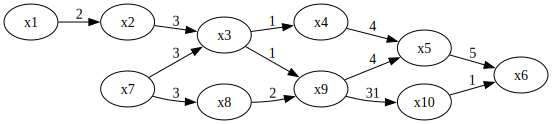

In [8]:
topological_sort_vertices = [
    GraphVertex("x1", 0),
    GraphVertex("x2", 1),
    GraphVertex("x3", 2),
    GraphVertex("x4", 3),
    GraphVertex("x5", 4),
    GraphVertex("x6", 5),
    GraphVertex("x7", 6),
    GraphVertex("x8", 7),
    GraphVertex("x9", 8),
    GraphVertex("x10", 9),
]

topological_sort_edges = [
    GraphEdge(topological_sort_vertices[0], topological_sort_vertices[1], 2),
    GraphEdge(topological_sort_vertices[1], topological_sort_vertices[2], 3),
    GraphEdge(topological_sort_vertices[2], topological_sort_vertices[3], 1),
    GraphEdge(topological_sort_vertices[3], topological_sort_vertices[4], 4),
    GraphEdge(topological_sort_vertices[4], topological_sort_vertices[5], 5),
    GraphEdge(topological_sort_vertices[6], topological_sort_vertices[2], 3),
    GraphEdge(topological_sort_vertices[2], topological_sort_vertices[8], 1),
    GraphEdge(topological_sort_vertices[8], topological_sort_vertices[4], 4),
    GraphEdge(topological_sort_vertices[6], topological_sort_vertices[7], 3),
    GraphEdge(topological_sort_vertices[7], topological_sort_vertices[8], 2),
    GraphEdge(topological_sort_vertices[8], topological_sort_vertices[9], 31),
    GraphEdge(topological_sort_vertices[9], topological_sort_vertices[5], 1),
]

topological_sort_graph = Graph(topological_sort_vertices, topological_sort_edges)
topological_sort_graph.build()
topological_sort_graph.compute_matrix()

topological_sort_graph.to_graphviz()

In [9]:
sorted_vertices: List[GraphVertex] = []
topological_sort_graph.topological_sort(sorted_vertices)
sorted_vertices

[5 x6,
 4 x5 -> x6 (5),
 3 x4 -> x5 (4),
 9 x10 -> x6 (1),
 8 x9 -> x5 (4) -> x10 (31),
 2 x3 -> x4 (1) -> x9 (1),
 1 x2 -> x3 (3),
 0 x1 -> x2 (2)]

# Tree detection

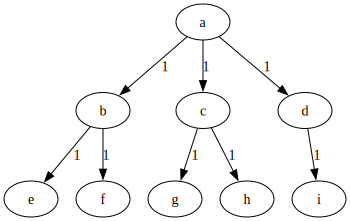

In [10]:
tree_vertices = [
    GraphVertex("a", 0),
    GraphVertex("b", 1),
    GraphVertex("c", 2),
    GraphVertex("d", 3),
    GraphVertex("e", 4),
    GraphVertex("f", 5),
    GraphVertex("g", 6),
    GraphVertex("h", 7),
    GraphVertex("i", 8),
]

tree_edges = [
    GraphEdge(tree_vertices[0], tree_vertices[1], 1),
    GraphEdge(tree_vertices[0], tree_vertices[2], 1),
    GraphEdge(tree_vertices[0], tree_vertices[3], 1),
    GraphEdge(tree_vertices[1], tree_vertices[4], 1),
    GraphEdge(tree_vertices[1], tree_vertices[5], 1),
    GraphEdge(tree_vertices[2], tree_vertices[6], 1),
    GraphEdge(tree_vertices[2], tree_vertices[7], 1),
    GraphEdge(tree_vertices[3], tree_vertices[8], 1),
]

tree_graph = Graph(tree_vertices, tree_edges)
tree_graph.build()
tree_graph.compute_matrix()

tree_graph.to_graphviz(orientation="vertical")

In [11]:
tree_graph.is_tree(), tree_graph.find_root()

(True, 0 a -> b (1) -> c (1) -> d (1))

In [12]:
topological_sort_graph.is_tree(), topological_sort_graph.find_root()

(False, None)

In [13]:
graph.is_tree(), graph.find_root()

(False, None)

# Dijkstra's Algorithm

In [14]:
topological_sort_graph.least_edges(topological_sort_vertices[0])

{'x1': 0,
 'x2': 1,
 'x3': 2,
 'x4': 3,
 'x5': 4,
 'x6': 5,
 'x7': inf,
 'x8': inf,
 'x9': 3,
 'x10': 4}

In [15]:
topological_sort_graph.dijkstra(topological_sort_vertices[0])

{'x1': 0,
 'x2': 2,
 'x3': 5,
 'x4': 6,
 'x5': 10,
 'x6': 15,
 'x7': inf,
 'x8': inf,
 'x9': 6,
 'x10': 37}

# Not directed

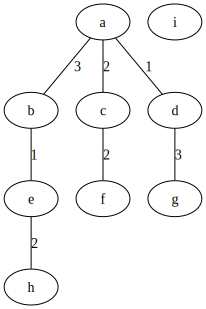

In [16]:
vertice_not_directed = [
    GraphVertex("a", 0),
    GraphVertex("b", 1),
    GraphVertex("c", 2),
    GraphVertex("d", 3),
    GraphVertex("e", 4),
    GraphVertex("f", 5),
    GraphVertex("g", 6),
    GraphVertex("h", 7),
    GraphVertex("i", 8),
]
    
edges_not_directed = [
    GraphEdge(vertice_not_directed[0], vertice_not_directed[1], 3, directed=False),
    GraphEdge(vertice_not_directed[0], vertice_not_directed[2], 2, directed=False),
    GraphEdge(vertice_not_directed[0], vertice_not_directed[3], 1, directed=False),
    GraphEdge(vertice_not_directed[1], vertice_not_directed[4], 1, directed=False),
    GraphEdge(vertice_not_directed[2], vertice_not_directed[5], 2, directed=False),
    GraphEdge(vertice_not_directed[3], vertice_not_directed[6], 3, directed=False),
    GraphEdge(vertice_not_directed[4], vertice_not_directed[7], 2, directed=False),
]

graph_not_directed = Graph(vertice_not_directed, edges_not_directed)
graph_not_directed.build()
graph_not_directed.compute_matrix()

graph_not_directed.to_graphviz(orientation="vertical")

In [17]:
graph_not_directed

0 a -> b (3) -> c (2) -> d (1)
1 b -> a (3) -> e (1)
2 c -> a (2) -> f (2)
3 d -> a (1) -> g (3)
4 e -> b (1) -> h (2)
5 f -> c (2)
6 g -> d (3)
7 h -> e (2)
8 i

In [18]:
graph_not_directed.matrix

[[0, 3, 2, 1, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 1, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 2, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 3, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 2, 0],
 [0, 0, 2, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [19]:
print(f"{vertice_not_directed[0]} is circuit: {graph_not_directed.detect_circuit(vertice_not_directed[0])}")
print(f"{vertice_not_directed[1]} is circuit: {graph_not_directed.detect_circuit(vertice_not_directed[1])}")
print(f"{vertice_not_directed[2]} is circuit: {graph_not_directed.detect_circuit(vertice_not_directed[2])}")
print(f"{vertice_not_directed[3]} is circuit: {graph_not_directed.detect_circuit(vertice_not_directed[3])}")

0 a -> b (3) -> c (2) -> d (1) is circuit: False
1 b -> a (3) -> e (1) is circuit: False
2 c -> a (2) -> f (2) is circuit: False
3 d -> a (1) -> g (3) is circuit: False


In [20]:
for v in graph.search(Queue()):
    if type(v) == GraphVertex:
        print(f"Treat Vertex {v.value}")
    # if type(v) == GraphEdge:
    #     print(f"Treat Edge {v.start.value} -> {v.end.value} ({v.weight})")

Treat Vertex a
Treat Vertex b
Treat Vertex c
Treat Vertex d
Treat Vertex e
Treat Vertex f
Treat Vertex g
Treat Vertex h
Treat Vertex i


In [21]:
for v in graph.recursive_search():
    if type(v) == GraphVertex:
        print(f"Treat Vertex {v.value}")
    # if type(v) == GraphEdge:
    #     print(f"Treat Edge {v.start.value} -> {v.end.value} ({v.weight})")

Treat Vertex a
Treat Vertex b
Treat Vertex e
Treat Vertex h
Treat Vertex c
Treat Vertex f
Treat Vertex d
Treat Vertex g
Treat Vertex i


# Prim algorithm

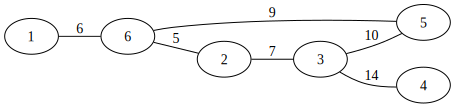

In [22]:
vertice_prim = [
    GraphVertex("1", 0),
    GraphVertex("2", 1),
    GraphVertex("3", 2),
    GraphVertex("4", 3),
    GraphVertex("5", 4),
    GraphVertex("6", 5),
]
    
edges_prim = [
    GraphEdge(vertice_prim[0], vertice_prim[5], 6, directed=False),
    GraphEdge(vertice_prim[5], vertice_prim[1], 5, directed=False),
    GraphEdge(vertice_prim[1], vertice_prim[2], 7, directed=False),
    GraphEdge(vertice_prim[2], vertice_prim[4], 10, directed=False),
    GraphEdge(vertice_prim[4], vertice_prim[5], 9, directed=False),
    GraphEdge(vertice_prim[2], vertice_prim[3], 14, directed=False),
]

graph_prim = Graph(vertice_prim, edges_prim)
graph_prim.build()
graph_prim.compute_matrix()

graph_prim.to_graphviz()

In [23]:
graph_prim.dijkstra(vertice_prim[0])

{'1': 0, '2': 11, '3': 18, '4': 32, '5': 15, '6': 6}

In [24]:
graph_prim.matrix

[[0, 0, 0, 0, 0, 6],
 [0, 0, 7, 0, 0, 5],
 [0, 7, 0, 14, 10, 0],
 [0, 0, 14, 0, 0, 0],
 [0, 0, 10, 0, 0, 9],
 [6, 5, 0, 0, 9, 0]]

In [25]:
mst_prim = graph_prim.prim(vertice_prim[0])
mst_prim

0 1 -> 6 (6)
1 2 -> 6 (5) -> 3 (7)
2 3 -> 2 (7) -> 4 (14)
3 4 -> 3 (14)
4 5 -> 6 (9)
5 6 -> 1 (6) -> 2 (5) -> 5 (9)

In [26]:
mst_prim.matrix

[[0, 0, 0, 0, 0, 6],
 [0, 0, 7, 0, 0, 5],
 [0, 7, 0, 14, 0, 0],
 [0, 0, 14, 0, 0, 0],
 [0, 0, 0, 0, 0, 9],
 [6, 5, 0, 0, 9, 0]]

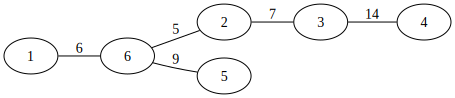

In [27]:
mst_prim.to_graphviz()

# Coloring

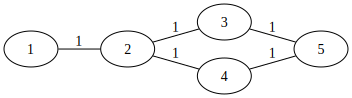

In [28]:
vertice_coloring = [
    GraphVertex("1", 0),
    GraphVertex("2", 1),
    GraphVertex("3", 2),
    GraphVertex("4", 3),
    GraphVertex("5", 4),
]
    
edges_coloring = [
    GraphEdge(vertice_coloring[0], vertice_coloring[1], 1, directed=False),
    GraphEdge(vertice_coloring[1], vertice_coloring[2], 1, directed=False),
    GraphEdge(vertice_coloring[1], vertice_coloring[3], 1, directed=False),
    GraphEdge(vertice_coloring[2], vertice_coloring[4], 1, directed=False),
    GraphEdge(vertice_coloring[3], vertice_coloring[4], 1, directed=False),
]

graph_coloring = Graph(vertice_coloring, edges_coloring)
graph_coloring.build()
graph_coloring.compute_matrix()

graph_coloring.to_graphviz()